<a href="https://colab.research.google.com/github/gmijo47/UUI-24-25/blob/main/Regresija_i_klasifikacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresija

In [1]:
import pandas as pd
d = pd.read_csv('igdata.csv', sep=',')

d.head()

,Impressions,Saves,Comments,Shares,Likes
0,3920,98,9,5,162
1,5394,194,7,14,224
2,4021,41,11,1,131
3,4528,172,10,7,213
4,2518,96,5,4,123


In [2]:
from sklearn.model_selection import train_test_split

X = d[['Impressions', 'Saves', 'Comments', 'Shares']]
Y = d['Likes']

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtr, Ytr)
model.score(Xte, Yte)

Ypr_lnr = model.predict(Xte)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

t_sc = 0
t_k = 1

for k in range(1, 90):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(Xtr, Ytr)
    sc = model.score(Xte, Yte)

    if sc > t_sc:
        t_sc = sc
        t_k = k

model = KNeighborsRegressor(n_neighbors=t_k)
model.fit(Xtr, Ytr)
Ypr_knr = model.predict(Xte)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

t_sc = 0
t_dp = 1

for dp in range(1, 200):
  model = DecisionTreeRegressor(max_depth=dp)
  model.fit(Xtr, Ytr)
  sc = model.score(Xte, Yte)

  if sc > t_sc:
    t_sc = sc
    t_dp = dp

model = DecisionTreeRegressor(max_depth=t_dp)
model.fit(Xtr, Ytr)

Ypr_dtr = model.predict(Xte)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

t_sc = 0
t_n = 1

for n in range(1, 200):

  model = RandomForestRegressor(n_estimators=n)
  model.fit(Xtr, Ytr)
  sc = model.score(Xte, Yte)

  if sc > t_sc:
    t_sc = sc
    t_n = n;

model = RandomForestRegressor(n_estimators=t_n)
model.fit(Xtr, Ytr)

Ypr_rfr = model.predict(Xte)

<Axes: >

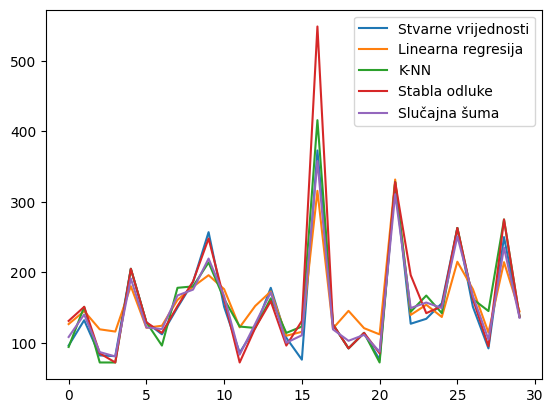

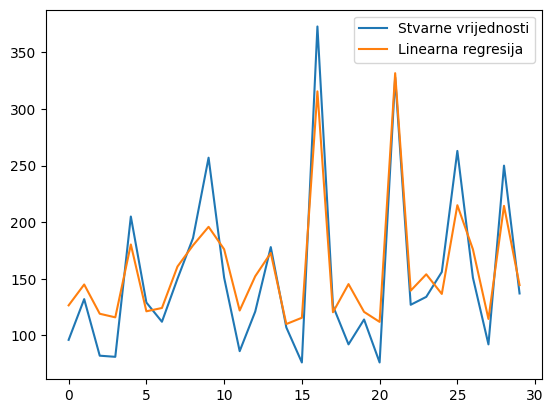

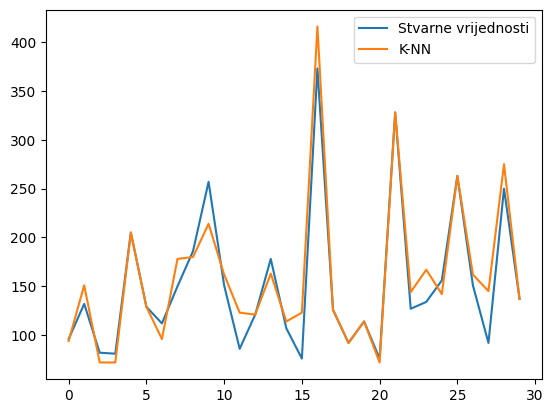

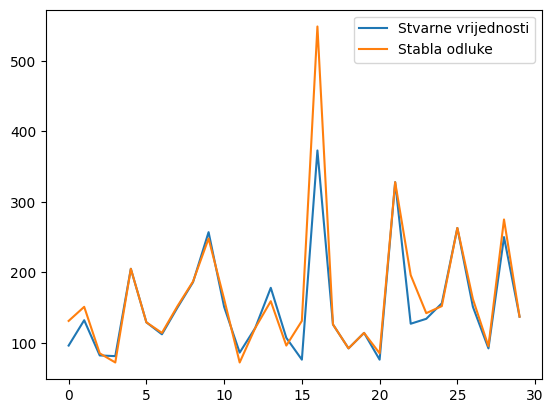

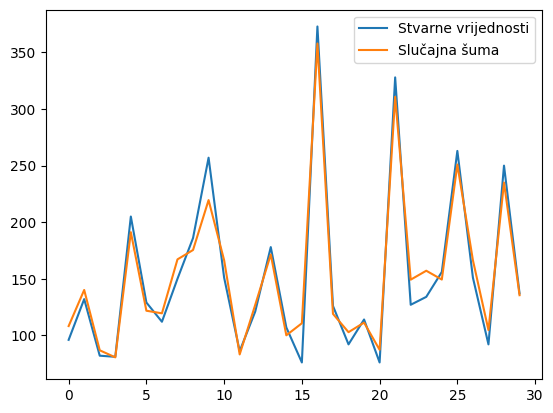

In [ ]:
points = 30

pd.DataFrame({
    'Stvarne vrijednosti': Yte.values[:points],
    'Linearna regresija': Ypr_lnr[:points],
    'K-NN': Ypr_knr[:points],
    'Stabla odluke': Ypr_dtr[:points],
    'Slučajna šuma': Ypr_rfr[:points],
}).plot.line()

pd.DataFrame({
    'Stvarne vrijednosti': Yte.values[:points],
    'Linearna regresija': Ypr_lnr[:points],
}).plot.line()

pd.DataFrame({
    'Stvarne vrijednosti': Yte.values[:points],
    'K-NN': Ypr_knr[:points],
}).plot.line()

pd.DataFrame({
    'Stvarne vrijednosti': Yte.values[:points],
    'Stabla odluke': Ypr_dtr[:points],
}).plot.line()

pd.DataFrame({
    'Stvarne vrijednosti': Yte.values[:points],
    'Slučajna šuma': Ypr_rfr[:points],
}).plot.line()

#Klasifikacija

In [3]:
import pandas as pd
d = pd.read_csv('igdata.csv', sep=',')

d.head()

,Impressions,Saves,Comments,Shares,Likes
0,3920,98,9,5,162
1,5394,194,7,14,224
2,4021,41,11,1,131
3,4528,172,10,7,213
4,2518,96,5,4,123


In [4]:
classes = []

for index, row in d.iterrows():
    if row.Likes < 33:
        c = 0
    elif row.Likes < 66:
        c = 1
    elif row.Likes < 99:
        c = 1
    elif row.Likes < 132:
        c = 2
    elif row.Likes < 166:
        c = 3
    elif row.Likes < 199:
        c = 3
    else:
        c = 4

    classes.append(c)

d['output'] = classes
d.head()

,Impressions,Saves,Comments,Shares,Likes,output
0,3920,98,9,5,162,3
1,5394,194,7,14,224,4
2,4021,41,11,1,131,2
3,4528,172,10,7,213,4
4,2518,96,5,4,123,2


In [17]:
from sklearn.model_selection import train_test_split

X = d[['Impressions', 'Saves', 'Comments', 'Shares']][:100]
Y = d['output'][:100]

Xtr, Xte, Ytr, Yte = train_test_split(X, Y, train_size=.8)
Xtr.head()

,Impressions,Saves,Comments,Shares
55,3988,118,6,9
67,10933,225,13,15
50,2998,42,4,1
57,3388,99,1,7
66,3818,116,6,0


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

0.6
0.65 1


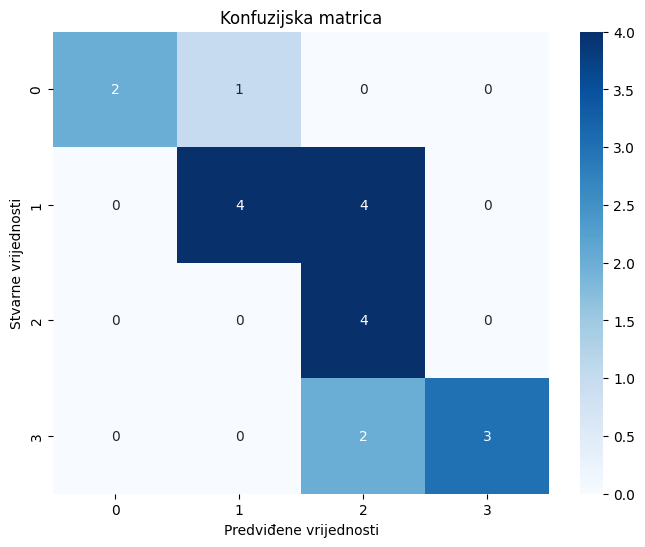

In [22]:
from sklearn.neighbors import KNeighborsClassifier

b_s = 0
b_n = 1

for n in range(1, 81):

  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(Xtr, Ytr)
  sc = model.score(Xte, Yte)

  if sc > b_s:
      b_s = sc
      b_n = n

model = KNeighborsClassifier(n_neighbors=b_n)
model.fit(Xtr, Ytr)

Y_knc_pr = model.predict(Xte)

cm = confusion_matrix(Yte, Y_knc_pr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Stvarne vrijednosti')
plt.title('Konfuzijska matrica')
plt.show()

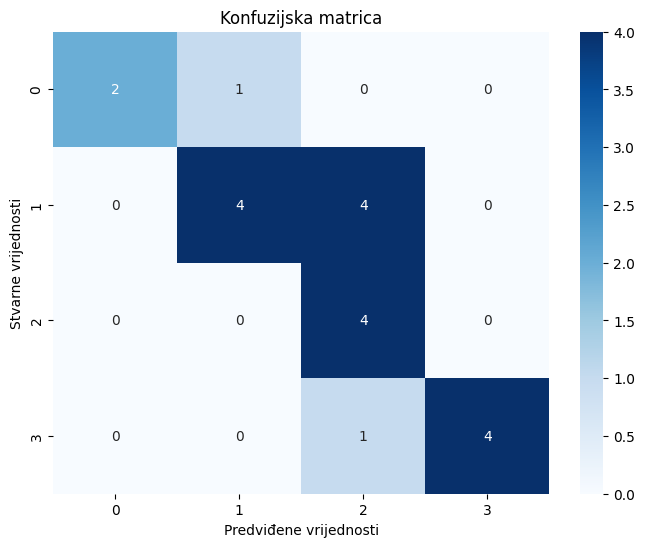

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(Xtr, Ytr)
model.score(Xte, Yte)

Y_gbc_pr = model.predict(Xte)

cm = confusion_matrix(Yte, Y_gbc_pr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Stvarne vrijednosti')
plt.title('Konfuzijska matrica')
plt.show()


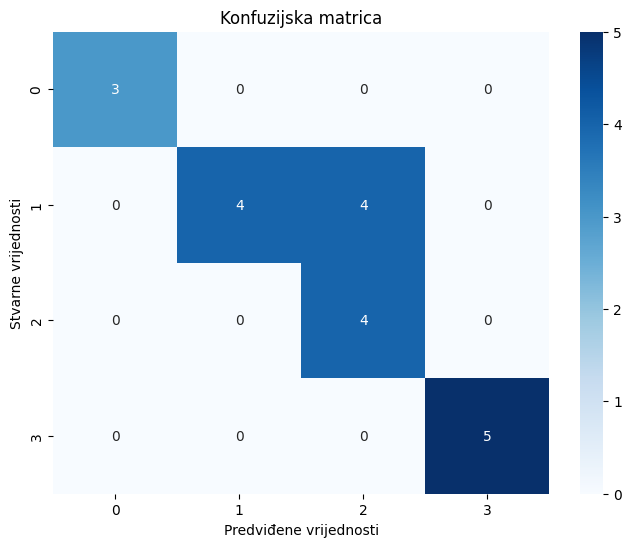

In [24]:
from sklearn.ensemble import RandomForestClassifier

t_sc = 0
t_n = 1

for n in range(1, 200):

  model = RandomForestClassifier(n_estimators=n)
  model.fit(Xtr, Ytr)
  sc = model.score(Xte, Yte)

  if sc > t_sc:
    t_sc = sc
    t_n = n;

model = RandomForestClassifier(n_estimators=n)
model.fit(Xtr, Ytr)

Ypr_rfr = model.predict(Xte)

cm = confusion_matrix(Yte, Ypr_rfr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Stvarne vrijednosti')
plt.title('Konfuzijska matrica')
plt.show()

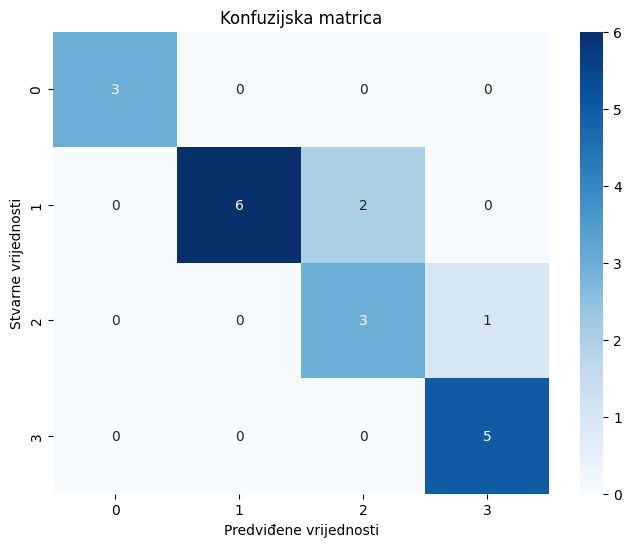

In [27]:
from sklearn.tree import DecisionTreeClassifier

t_sc = 0
t_dp = 1

for dp in range(1, 200):
  model = DecisionTreeClassifier(max_depth=dp)
  model.fit(Xtr, Ytr)
  sc = model.score(Xte, Yte)

  if sc > t_sc:
    t_sc = sc
    t_dp = dp

model = DecisionTreeClassifier(max_depth=t_dp)
model.fit(Xtr, Ytr)

Ypr_dtr = model.predict(Xte)
cm = confusion_matrix(Yte, Ypr_dtr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Stvarne vrijednosti')
plt.title('Konfuzijska matrica')
plt.show()